# くずし字 MNIST データセットの学習
[github](https://github.com/rois-codh/kmnist)からダウンロードしたくずし字データセットを今回作成したニューラルネットワークのクラスneuralNetworkを用いて学習させ、その精度を求めた。

In [1]:
import numpy as np
from neural import neuralNetwork #自作ライブラリ
import matplotlib.pyplot as plt

In [2]:
x_train = np.load('./datasets/kmnist-train-imgs.npz')['arr_0']
t_train = np.load('./datasets/kmnist-train-labels.npz')['arr_0']
x_test = np.load('./datasets/kmnist-test-imgs.npz')['arr_0']
t_test = np.load('./datasets/kmnist-test-labels.npz')['arr_0']

t_train = np.identity(10)[t_train]
t_test = np.identity(10)[t_test]
x_train = x_train.reshape((60000,-1))
x_test = x_test.reshape((10000,-1))

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
net = neuralNetwork(
    epoch = 33000,
    learning_rate = 0.05,
    batch_size = 500
)
layer_list = [784,[500,80],10]
net.set_layer(layer_list)

<< successfully layers are updated >>


In [5]:
elapsed_time,train_acc = net.train(x_train,t_train)

--------- epoch0 ---------
loss : 363.3290027790962
accuracy : 0.112
time : 0.05027008056640625 [sec]
--------------------------

--------- epoch100 ---------
loss : 138.73707333009642
accuracy : 0.76
time : 3.5741240978240967 [sec]
----------------------------

--------- epoch200 ---------
loss : 114.66171616351994
accuracy : 0.778
time : 7.42105507850647 [sec]
----------------------------

--------- epoch300 ---------
loss : 104.95167107973808
accuracy : 0.816
time : 11.268707036972046 [sec]
----------------------------

--------- epoch400 ---------
loss : 96.94527795343151
accuracy : 0.814
time : 15.029253959655762 [sec]
----------------------------

--------- epoch500 ---------
loss : 91.39363687323205
accuracy : 0.836
time : 18.97148895263672 [sec]
----------------------------

--------- epoch600 ---------
loss : 79.79922263112856
accuracy : 0.872
time : 22.550989151000977 [sec]
----------------------------

--------- epoch700 ---------
loss : 80.44433139322584
accuracy : 0.868
ti

--------- epoch6200 ---------
loss : 33.70901190770036
accuracy : 0.958
time : 237.55121612548828 [sec]
-----------------------------

--------- epoch6300 ---------
loss : 33.752248827383156
accuracy : 0.956
time : 242.18638610839844 [sec]
-----------------------------

--------- epoch6400 ---------
loss : 30.873214817546625
accuracy : 0.962
time : 246.12248396873474 [sec]
-----------------------------

--------- epoch6500 ---------
loss : 30.6847753338347
accuracy : 0.954
time : 250.33747506141663 [sec]
-----------------------------

--------- epoch6600 ---------
loss : 31.070930308634367
accuracy : 0.954
time : 253.77099299430847 [sec]
-----------------------------

--------- epoch6700 ---------
loss : 27.81820488100822
accuracy : 0.966
time : 257.23845195770264 [sec]
-----------------------------

--------- epoch6800 ---------
loss : 31.04791989786742
accuracy : 0.954
time : 260.7291491031647 [sec]
-----------------------------

--------- epoch6900 ---------
loss : 31.10100653693257

--------- epoch12300 ---------
loss : 19.143623112878785
accuracy : 0.986
time : 456.2841830253601 [sec]
------------------------------

--------- epoch12400 ---------
loss : 17.769637518891862
accuracy : 0.984
time : 459.80297899246216 [sec]
------------------------------

--------- epoch12500 ---------
loss : 17.68043068332907
accuracy : 0.988
time : 463.3378429412842 [sec]
------------------------------

--------- epoch12600 ---------
loss : 21.628068810718265
accuracy : 0.982
time : 466.83443903923035 [sec]
------------------------------

--------- epoch12700 ---------
loss : 22.65399744836519
accuracy : 0.966
time : 470.13038301467896 [sec]
------------------------------

--------- epoch12800 ---------
loss : 21.721196229742276
accuracy : 0.972
time : 473.4984800815582 [sec]
------------------------------

--------- epoch12900 ---------
loss : 20.07413070298228
accuracy : 0.972
time : 476.97711300849915 [sec]
------------------------------

--------- epoch13000 ---------
loss : 20

--------- epoch18300 ---------
loss : 14.666230788814579
accuracy : 0.978
time : 705.6745891571045 [sec]
------------------------------

--------- epoch18400 ---------
loss : 15.09523531960623
accuracy : 0.988
time : 710.2143089771271 [sec]
------------------------------

--------- epoch18500 ---------
loss : 12.919121125897469
accuracy : 0.992
time : 714.8064870834351 [sec]
------------------------------

--------- epoch18600 ---------
loss : 13.077826504134507
accuracy : 0.99
time : 719.0454461574554 [sec]
------------------------------

--------- epoch18700 ---------
loss : 13.98381329426456
accuracy : 0.988
time : 722.9495811462402 [sec]
------------------------------

--------- epoch18800 ---------
loss : 14.16368379228864
accuracy : 0.99
time : 728.2705359458923 [sec]
------------------------------

--------- epoch18900 ---------
loss : 15.17054528220248
accuracy : 0.984
time : 731.7139070034027 [sec]
------------------------------

--------- epoch19000 ---------
loss : 15.439384

--------- epoch24400 ---------
loss : 9.760775973942597
accuracy : 0.994
time : 892.8731541633606 [sec]
------------------------------

--------- epoch24500 ---------
loss : 10.513987818170259
accuracy : 0.99
time : 895.7365729808807 [sec]
------------------------------

--------- epoch24600 ---------
loss : 9.559225247797151
accuracy : 0.994
time : 898.656238079071 [sec]
------------------------------

--------- epoch24700 ---------
loss : 11.656585292273183
accuracy : 0.98
time : 901.3553111553192 [sec]
------------------------------

--------- epoch24800 ---------
loss : 10.024806491176287
accuracy : 0.992
time : 904.2248771190643 [sec]
------------------------------

--------- epoch24900 ---------
loss : 10.291192900075348
accuracy : 0.99
time : 907.1939251422882 [sec]
------------------------------

--------- epoch25000 ---------
loss : 10.922480847425874
accuracy : 0.984
time : 910.135852098465 [sec]
------------------------------

--------- epoch25100 ---------
loss : 10.3299770

--------- epoch30500 ---------
loss : 8.557007040343967
accuracy : 0.99
time : 1075.196758031845 [sec]
------------------------------

--------- epoch30600 ---------
loss : 8.584565752773237
accuracy : 0.994
time : 1077.8747210502625 [sec]
------------------------------

--------- epoch30700 ---------
loss : 9.58749126321202
accuracy : 0.996
time : 1080.6445791721344 [sec]
------------------------------

--------- epoch30800 ---------
loss : 8.884147938780222
accuracy : 0.994
time : 1083.3109941482544 [sec]
------------------------------

--------- epoch30900 ---------
loss : 9.565475479418431
accuracy : 0.994
time : 1085.8331639766693 [sec]
------------------------------

--------- epoch31000 ---------
loss : 8.856179743616497
accuracy : 0.99
time : 1088.7125389575958 [sec]
------------------------------

--------- epoch31100 ---------
loss : 9.680126936713691
accuracy : 0.994
time : 1091.4848110675812 [sec]
------------------------------

--------- epoch31200 ---------
loss : 8.57983

In [16]:
print('train accuracy : {}\ntest accuracy : {}'.format(
    net.accuracy(x_train,t_train),net.accuracy(x_test,t_test)))

train accuracy : 0.9934666666666667
test accuracy : 0.903


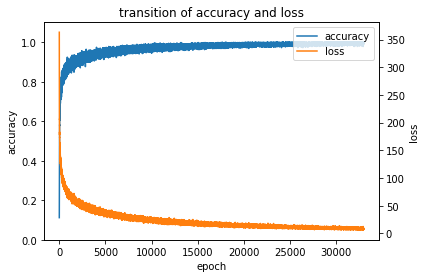

In [7]:
net.visualize()

In [6]:
name = 'train_0.9904,test_0.904'
net.save(name)

In [15]:
name = 'train_0.9904,test_0.904'
net = neuralNetwork.load(name)

successfully network was constructed!


In [8]:
import torch
import torch.nn as nn
import torch.optim as optimizers

In [9]:
class MLP(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dim,
        output_dim,
    ):
        super().__init__()
        self.l1 = nn.Linear(input_dim,hidden_dim)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim,output_dim)
        self.a2 = nn.Sigmoid()
        
        
        self.layers = [self.l1,self.a1,self.l2,self.a2]
        
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
torch.manual_seed(123)
device = torch.device('cpu')
model = MLP(784,50,10).to(device)

criterion = nn.BCELoss()
optimizer = optimizers.SGD(model.parameters(),lr=0.1)

def compute_loss(t,y):
    return criterion(y,t)

def train_step(x,t):
    model.train()
    preds = model(x)
    #print(preds.shape)
    loss = compute_loss(t,preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

epochs = 10000
batch_size = 500
n_batches = x_train.shape[0]//batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_ = x_train.copy()
    t_ = t_train.copy()
    x_ = torch.Tensor(x_).to(device)
    t_ = torch.Tensor(t_).to(device)
    
    for n_batch in range(n_batches):
        start = n_batch*batch_size
        end = start + batch_size
        loss = train_step(x_[start:end],t_[start:end])
        train_loss += loss.item()
        
    print('epoch : {}, loss : {:.3}'.format(
        epoch + 1,
        train_loss
    ))

epoch : 1, loss : 46.3
epoch : 2, loss : 35.5
epoch : 3, loss : 31.4
epoch : 4, loss : 28.1
epoch : 5, loss : 25.4
epoch : 6, loss : 23.3
epoch : 7, loss : 21.6
epoch : 8, loss : 20.3
epoch : 9, loss : 19.3
epoch : 10, loss : 18.5
epoch : 11, loss : 17.8
epoch : 12, loss : 17.2
epoch : 13, loss : 16.6
epoch : 14, loss : 16.2
epoch : 15, loss : 15.8
epoch : 16, loss : 15.4
epoch : 17, loss : 15.1
epoch : 18, loss : 14.8
epoch : 19, loss : 14.5
epoch : 20, loss : 14.2
epoch : 21, loss : 14.0
epoch : 22, loss : 13.8
epoch : 23, loss : 13.6
epoch : 24, loss : 13.4
epoch : 25, loss : 13.2
epoch : 26, loss : 13.0
epoch : 27, loss : 12.9
epoch : 28, loss : 12.7
epoch : 29, loss : 12.6
epoch : 30, loss : 12.5
epoch : 31, loss : 12.3
epoch : 32, loss : 12.2
epoch : 33, loss : 12.1
epoch : 34, loss : 12.0
epoch : 35, loss : 11.9
epoch : 36, loss : 11.8
epoch : 37, loss : 11.6
epoch : 38, loss : 11.5
epoch : 39, loss : 11.5
epoch : 40, loss : 11.4
epoch : 41, loss : 11.3
epoch : 42, loss : 11.2
e

epoch : 335, loss : 5.13
epoch : 336, loss : 5.12
epoch : 337, loss : 5.11
epoch : 338, loss : 5.11
epoch : 339, loss : 5.1
epoch : 340, loss : 5.09
epoch : 341, loss : 5.09
epoch : 342, loss : 5.08
epoch : 343, loss : 5.08
epoch : 344, loss : 5.07
epoch : 345, loss : 5.06
epoch : 346, loss : 5.06
epoch : 347, loss : 5.05
epoch : 348, loss : 5.05
epoch : 349, loss : 5.04
epoch : 350, loss : 5.03
epoch : 351, loss : 5.03
epoch : 352, loss : 5.02
epoch : 353, loss : 5.02
epoch : 354, loss : 5.01
epoch : 355, loss : 5.01
epoch : 356, loss : 5.0
epoch : 357, loss : 4.99
epoch : 358, loss : 4.99
epoch : 359, loss : 4.98
epoch : 360, loss : 4.98
epoch : 361, loss : 4.97
epoch : 362, loss : 4.97
epoch : 363, loss : 4.96
epoch : 364, loss : 4.95
epoch : 365, loss : 4.95
epoch : 366, loss : 4.94
epoch : 367, loss : 4.94
epoch : 368, loss : 4.93
epoch : 369, loss : 4.93
epoch : 370, loss : 4.92
epoch : 371, loss : 4.92
epoch : 372, loss : 4.91
epoch : 373, loss : 4.91
epoch : 374, loss : 4.9
epo

epoch : 664, loss : 3.82
epoch : 665, loss : 3.82
epoch : 666, loss : 3.81
epoch : 667, loss : 3.81
epoch : 668, loss : 3.81
epoch : 669, loss : 3.81
epoch : 670, loss : 3.8
epoch : 671, loss : 3.8
epoch : 672, loss : 3.8
epoch : 673, loss : 3.8
epoch : 674, loss : 3.79
epoch : 675, loss : 3.79
epoch : 676, loss : 3.79
epoch : 677, loss : 3.79
epoch : 678, loss : 3.78
epoch : 679, loss : 3.78
epoch : 680, loss : 3.78
epoch : 681, loss : 3.78
epoch : 682, loss : 3.77
epoch : 683, loss : 3.77
epoch : 684, loss : 3.77
epoch : 685, loss : 3.77
epoch : 686, loss : 3.76
epoch : 687, loss : 3.76
epoch : 688, loss : 3.76
epoch : 689, loss : 3.76
epoch : 690, loss : 3.75
epoch : 691, loss : 3.75
epoch : 692, loss : 3.75
epoch : 693, loss : 3.75
epoch : 694, loss : 3.74
epoch : 695, loss : 3.74
epoch : 696, loss : 3.74
epoch : 697, loss : 3.74
epoch : 698, loss : 3.73
epoch : 699, loss : 3.73
epoch : 700, loss : 3.73
epoch : 701, loss : 3.73
epoch : 702, loss : 3.72
epoch : 703, loss : 3.72
epoc

epoch : 994, loss : 3.16
epoch : 995, loss : 3.16
epoch : 996, loss : 3.15
epoch : 997, loss : 3.15
epoch : 998, loss : 3.15
epoch : 999, loss : 3.15
epoch : 1000, loss : 3.15
epoch : 1001, loss : 3.15
epoch : 1002, loss : 3.14
epoch : 1003, loss : 3.14
epoch : 1004, loss : 3.14
epoch : 1005, loss : 3.14
epoch : 1006, loss : 3.14
epoch : 1007, loss : 3.14
epoch : 1008, loss : 3.14
epoch : 1009, loss : 3.13
epoch : 1010, loss : 3.13
epoch : 1011, loss : 3.13
epoch : 1012, loss : 3.13
epoch : 1013, loss : 3.13
epoch : 1014, loss : 3.13
epoch : 1015, loss : 3.12
epoch : 1016, loss : 3.12
epoch : 1017, loss : 3.12
epoch : 1018, loss : 3.12
epoch : 1019, loss : 3.12
epoch : 1020, loss : 3.12
epoch : 1021, loss : 3.12
epoch : 1022, loss : 3.11
epoch : 1023, loss : 3.11
epoch : 1024, loss : 3.11
epoch : 1025, loss : 3.11
epoch : 1026, loss : 3.11
epoch : 1027, loss : 3.11
epoch : 1028, loss : 3.1
epoch : 1029, loss : 3.1
epoch : 1030, loss : 3.1
epoch : 1031, loss : 3.1
epoch : 1032, loss : 3

epoch : 1311, loss : 2.73
epoch : 1312, loss : 2.73
epoch : 1313, loss : 2.73
epoch : 1314, loss : 2.73
epoch : 1315, loss : 2.72
epoch : 1316, loss : 2.72
epoch : 1317, loss : 2.72
epoch : 1318, loss : 2.72
epoch : 1319, loss : 2.72
epoch : 1320, loss : 2.72
epoch : 1321, loss : 2.72
epoch : 1322, loss : 2.72
epoch : 1323, loss : 2.72
epoch : 1324, loss : 2.71
epoch : 1325, loss : 2.71
epoch : 1326, loss : 2.71
epoch : 1327, loss : 2.71
epoch : 1328, loss : 2.71
epoch : 1329, loss : 2.71
epoch : 1330, loss : 2.71
epoch : 1331, loss : 2.71
epoch : 1332, loss : 2.7
epoch : 1333, loss : 2.7
epoch : 1334, loss : 2.7
epoch : 1335, loss : 2.7
epoch : 1336, loss : 2.7
epoch : 1337, loss : 2.7
epoch : 1338, loss : 2.7
epoch : 1339, loss : 2.7
epoch : 1340, loss : 2.7
epoch : 1341, loss : 2.69
epoch : 1342, loss : 2.69
epoch : 1343, loss : 2.69
epoch : 1344, loss : 2.69
epoch : 1345, loss : 2.69
epoch : 1346, loss : 2.69
epoch : 1347, loss : 2.69
epoch : 1348, loss : 2.69
epoch : 1349, loss : 

In [ ]:
from sklearn.metrics import accuracy_score

def test_step(x,t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.eval()
    preds = model(x)
    loss = compute_loss(t,preds)
    return loss,preds

loss,preds = test_step(x_test,t_test)
test_loss = loss.item()
preds = np.argmax(preds.data.cpu().numpy(),axis=1)
ans = np.argmax(t_test,axis=1)
test_acc = accuracy_score(ans,preds)

print('test_loss : {:.3f}, test_acc : {:.3f}'.format(
    test_loss,
    test_acc
))